In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
def gg(df, df_all):
    cnt = 0
    cntr = 0
    s = 0
    for index, row in df.iterrows():
        try:
            if True:
                if row['Best player price'] - (row['Best model price upper'] - row['Best model price lower']) / 2 <= row['Real price'] <= row['Best player price'] + (row['Best model price upper'] - row['Best model price lower']) / 2:
                    #s += (row['Best model price upper'] - row['Best model price lower']) / (row['Real price'])
                    #s += (row['Best model price upper'] - row['Best model price lower'])
                    cnt += 1
                cntr += 1
                s += (row['Best model price upper'] - row['Best model price lower']) / (row['Real price'])
        except ValueError:
            pass
            #print(row['Best model price lower'], row['Best model price upper'])
    return [cnt / cntr, (s / cntr), df.shape[0] / df_all.shape[0]]

In [133]:
sym = ['ETHUSDT', 'SOLUSDT', 'BNBUSDT', 'XRPUSDT', 'DOGEUSDT', 'ALTUSDT', 'GUSDT', 'BANANAUSDT', 'LRCUSDT', 'HMSTRUSDT', 'ATMUSDT', 'QUICKUSDT', 'EURUSDT', 'STRAXUSDT', 'BTTCUSDT']
print(len(sym))

15


In [183]:
for i in range(10, 15):
    df = pd.read_csv(f"C:\\Users\\9\\Desktop\\output\\{sym[i]}.csv")
    df = df.dropna()

    print(sym[i], df.loc[df["Num of obs"] >= 4].shape[0], f"{round(df.loc[df['Num of obs'] >= 4].shape[0] / df.shape[0] * 100, 2)}\%")

ATMUSDT 5 0.18\%
QUICKUSDT 15 0.27\%
EURUSDT 46 0.94\%
STRAXUSDT 7 0.21\%
BTTCUSDT 1 0.93\%


In [135]:
rrr = []
for i in range(15):
    #df = pd.read_csv(f"C:\\Users\\9\\VSPython\\res_{i}_5.csv")
    df = pd.read_csv(f"C:\\Users\\9\\Desktop\\output\\{sym[i]}.csv")
    df = df.dropna()

    print(df.loc[df["Num of obs"] >= 4].shape[0])

    rrr += [gg(df.loc[df["Num of obs"] >= 4], df)]

326
78
100
53
169
75
24
17
11
33
5
15
46
7
1


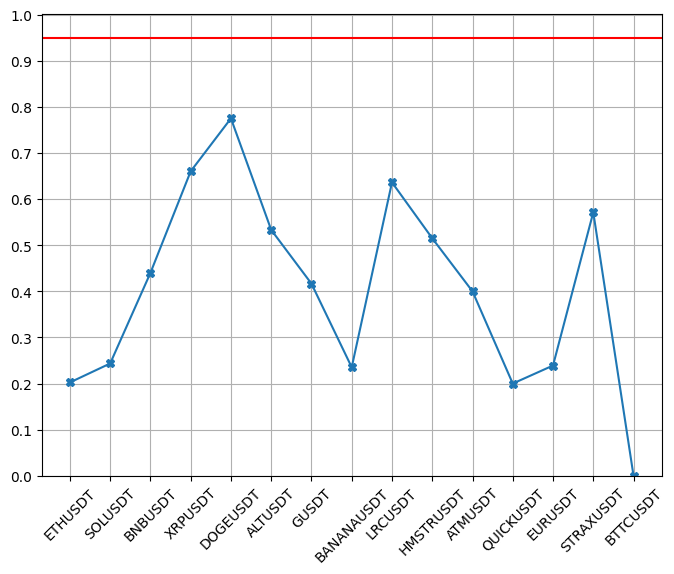

In [156]:
plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
plt.xticks([i for i in range(15)], [sym[i] for i in range(15)], rotation=45)
plt.yticks([round(i / 10, 2) for i in range(11)], [round(i / 10, 2) for i in range(11)])
plt.ylim(0, 1.002)
plt.grid()
plt.plot([i for i in range(15)], [i[0] for i in rrr], marker="X")
plt.axhline(y=0.95, color='r', linestyle='-')

In [ ]:
plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
plt.xticks([i for i in range(1, 21)], [i for i in range(1, 21)], rotation=45)
#plt.yticks([round(i / 20, 2) for i in range(11)], [round(i / 20, 2) for i in range(11)])
#plt.ylim(0, 1.5)
plt.grid()
plt.ylabel("средняя длина интервальной оценки (ticks)")
plt.xlabel("доля трейдовых событий (%)")
plt.plot([i for i in range(1, 21)], [i[1] for i in rrr], marker="X", color="g")
plt.savefig("C:\\Users\\9\\Desktop\\Sim_res_2")

In [122]:
print(sum([i[2] for i in rrr]) / len(rrr))

0.016977993966438915


In [151]:
rtt = []
for i in range(15):
    #df = pd.read_csv(f"C:\\Users\\9\\VSPython\\res_{i}_5.csv")
    df = pd.read_csv(f"C:\\Users\\9\\Desktop\\output\\{sym[i]}.csv")
    df = df.dropna()

    print(df.loc[df["Num of obs"] < 4].shape[0])

    rtt += [gg(df.loc[df["Num of obs"] < 4], df)]

26133
25910
30135
37904
36043
12550
3480
4231
3197
13148
2786
5480
4854
3276
107


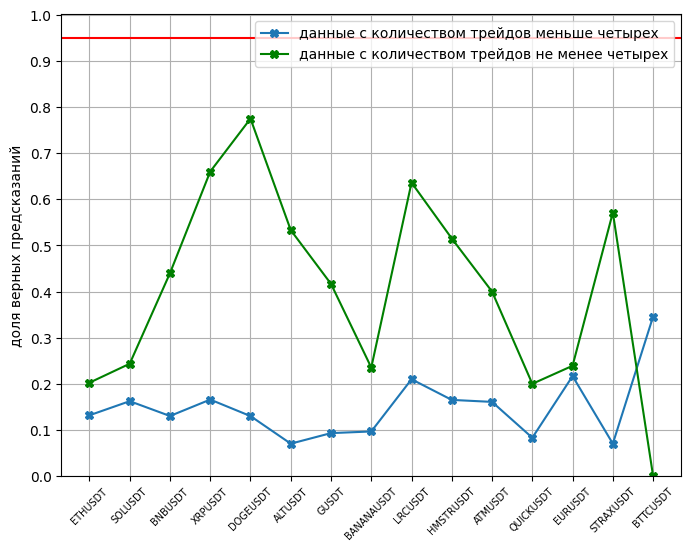

In [175]:
plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
plt.xticks([i for i in range(15)], [sym[i] for i in range(15)], rotation=45, size=7)
plt.yticks([round(i / 10, 2) for i in range(11)], [round(i / 10, 2) for i in range(11)])
plt.ylim(0, 1.002)
plt.grid()
plt.ylabel("доля верных предсказаний")
#plt.xlabel("валютные пары по убыванию волатильности")
plt.plot([i for i in range(15)], [i[0] for i in rtt], marker="X", label="данные с количеством трейдов меньше четырех")
plt.plot([i for i in range(15)], [i[0] for i in rrr], marker="X", color="g", label="данные с количеством трейдов не менее четырех")
plt.legend()
plt.axhline(y=0.95, color='r', linestyle='-')
plt.savefig("C:\\Users\\9\\Desktop\\Real_res_1")

In [158]:
from math import log

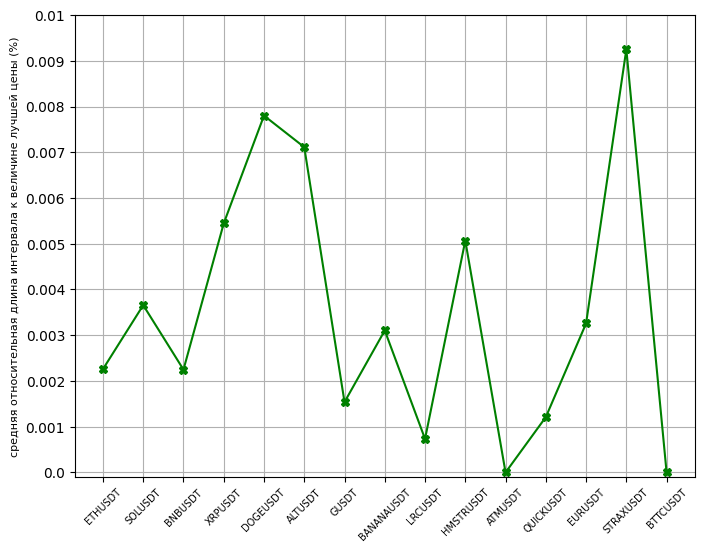

In [200]:
plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
plt.xticks([i for i in range(15)], [sym[i] for i in range(15)], rotation=45, size=7)
plt.yticks([i / 1000 for i in range(11)], [i / 1000 for i in range(11)])
plt.ylabel("средняя относительная длина интервала к величине лучшей цены (%)", size=8)
plt.ylim(-0.0001, 0.01)
plt.grid()
plt.plot([i for i in range(15)], [i[1] * 100 for i in rtt], marker="X", color="g")
plt.savefig("C:\\Users\\9\\Desktop\\Real_res_2")

In [15]:
df = pd.read_csv(f"C:\\Users\\9\\VSPython\\res_20_4.csv")
df = df.loc[1:]

In [138]:
#df = get_file_in_csv("C:\\Users\\9\\VSPython\\res.txt")
#df = pd.read_csv("C:\\Users\\9\\Desktop\\output\\ETHUSDT.csv")
df = pd.read_csv("C:\\Users\\9\\VSPython\\res_20_3.csv")
df = df.loc[1:]

In [530]:
df.loc[(df['Best model price lower'] <= df['Real price']) & (df['Real price'] <= df['Best model price upper'])].shape[0] / df.shape[0]

0.2106552357624005

In [416]:
df.loc[(df["Best player price"] == df["Real price"]) | (df['Best model price lower'] <= df['Real price']) & (df['Real price'] <= df['Best model price upper'])].shape[0] / df.shape[0]

0.9123801438274071

In [294]:
df.loc[(df["Best player price"] == df["Real price"]) & (df['Best model price lower'] <= df['Best player price']) & (df['Best player price'] <= df['Best model price upper']) & (df['Delta execution'] > 30) & (df["Num of obs"] >= 5)].shape[0] / df.loc[(df['Best model price lower'] <= df['Best player price']) & (df['Best player price'] <= df['Best model price upper']) & (df['Delta execution'] > 30) & (df["Num of obs"] >= 5)].shape[0]

0.6865671641791045

In [529]:
df.loc[(df["Best player price"] == df["Real price"])].shape[0] / df.shape[0]

0.2145335782812819

In [410]:
df.loc[(df["Best player price"] == df["Real price"]) & (df['Delta execution'] > 30) & (df["Num of obs"] >= 3)].shape[0] / df.loc[(df['Delta execution'] > 30) & (df["Num of obs"] >= 3)].shape[0]

0.6659955707670626

In [586]:
cnt = 0
cntr = 0
for index, row in df.iterrows():
    try:
        if round((row['Best model price lower'] + row['Best model price upper']) / 2) == row['Best player price'] and row["Delta execution"] > 30 and row["Num of obs"] >= 5:
            cntr += 1
            if row['Best player price'] == row['Real price']:
                cnt += 1
    except ValueError:
        pass
        #print(row['Best model price lower'], row['Best model price upper'])
print(cnt / cntr)
print(cnt, cntr)

0.6732484076433121
1057 1570


In [97]:
df.loc[(df['Best model price lower'] <= df['Real price']) & (df['Real price'] <= df['Best model price upper']) & (df["Num of obs"] >= 4)].shape[0] / df.loc[df["Num of obs"] >= 4].shape[0]

0.19230125523012553

In [16]:
df2 = df.loc[df["Num of obs"] >= 4]

In [18]:
cnt = 0
cntr = 0
s = 0
for index, row in df.iterrows():
    try:
        if True:
            cntr += 1
            if row['Best player price'] - (row['Best model price upper'] - row['Best model price lower']) / 2 <= row['Real price'] <= row['Best player price'] + (row['Best model price upper'] - row['Best model price lower']) / 2:
                #s += (row['Best model price upper'] - row['Best model price lower']) / (row['Real price'])
                s += (row['Best model price upper'] - row['Best model price lower'])
                cnt += 1
    except ValueError:
        pass
        #print(row['Best model price lower'], row['Best model price upper'])
print(cnt / cntr)
print(cnt, cntr, s / cnt, df2.shape[0] / df.shape[0])

0.9944652162392911
101337 101901 0.04036718621859653 0.01903808598541722


In [656]:
cnt = 0
cntr = 0
for index, row in df2.iterrows():
    try:
        if True:
            cntr += 1
            if row['Best player price'] == row['Real price']:
                cnt += 1
    except ValueError:
        pass
        #print(row['Best model price lower'], row['Best model price upper'])
print(cnt / cntr)
print(cnt, cntr)

0.003067484662576687
1 326


In [55]:
df

,Best player price,Best model price lower,Best model price upper,Real price,Delta execution,Num of obs
1,0,0.0,0.0,0,28.392,3
2,0,0.0,0.0,0,76.776,1
3,0,0.0,0.0,0,41.189,3
4,0,0.0,0.0,0,57.811,2
5,0,0.0,0.0,0,100.000,0
...,...,...,...,...,...,...
81524,27,NaN,NaN,7,3.824,92
81525,2,NaN,NaN,4,6.122,45
81526,20,NaN,NaN,0,47.120,63
81527,20,NaN,NaN,0,57.840,42


In [234]:
d_ex = 15

In [235]:
df.loc[(df['Best player price'] == df['Real price']) & (df['Best model price lower'] <= df['Real price']) & (df['Real price'] <= df['Best model price upper']) & (df['Delta execution'] > d_ex) & (df["Num of obs"] >= 3)].shape[0] /\
df.loc[(df['Delta execution'] > d_ex) & (df["Num of obs"] >= 3)].shape[0]

0.8866183256427159

In [236]:
df.loc[(df['Best player price'] != df['Real price']) & (df['Best model price lower'] <= df['Real price']) & (df['Real price'] <= df['Best model price upper']) & (df['Delta execution'] > d_ex) & (df["Num of obs"] >= 3)].shape[0] /\
df.loc[(df['Delta execution'] > d_ex) & (df["Num of obs"] >= 3)].shape[0]

0.013315754779169414

In [238]:
df.loc[(df['Best player price'] == df['Real price']) & ((df['Best model price lower'] > df['Real price']) | (df['Real price'] > df['Best model price upper'])) & (df['Delta execution'] > d_ex) & (df["Num of obs"] >= 3)].shape[0] /\
df.loc[(df['Delta execution'] > d_ex) & (df["Num of obs"] >= 3)].shape[0]

0.005405405405405406

In [92]:
df1 = df.loc[(df['Best player price'] != df['Real price']) & ((df['Best model price lower'] > df['Real price']) | (df['Real price'] > df['Best model price upper']))]

In [93]:
df1.shape[0] / df.shape[0]

0.08756991610067918

In [85]:
cnt = 0
for index, row in df.iterrows():
    try:
        if abs(row['Real price'] - (row['Best model price lower'] + row['Best model price upper']) / 2) <= abs(row['Real price'] - row['Best player price']) and\
        row["Num of obs"] >= 3:
            cnt += 1
    except ValueError:
        print("W")
print(cnt / df.loc[(df['Num of obs'] >= 3)].shape[0])

0.5311166148495547


In [156]:
cnt = 0
for index, row in df.iterrows():
    try:
        if row['Real price'] == round((row['Best model price lower'] + row['Best model price upper']) / 2):
            cnt += 1
    except ValueError:
        print("W")
print(cnt / df.loc[(df['Num of obs'] >= 0)].shape[0])

W
W
W
W
W
W
W
W
W
W
W
W
W
W
W
W
W
W
W
W
W
W
W
W
W
W
W
W
W
W
W
W
W
W
0.6235238309240256
